In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
variable = pd.read_csv(r"C:\Users\cdot\Downloads\MR data - Compiled Data Set.csv")
variable.head()

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,"Minor molests mute girl, sent to observation home",GHAZIABAD: A 12-year-old boy was sent to an ob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,Family out to buy car robbed of Rs 1 lakh by b...,GHAZIABAD: A family that had visited an automo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,"This gang posed as cops to extort youths, couples",GHAZIABAD: Five persons were arrested on Monda...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,"Residents object to loud music, thrashed in Gh...","Ghaziabad: Four tenants, including two soldier...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,Man kills self after being refused money for d...,GHAZIABAD: A 25-year-old allegedly committed s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
variable= variable.drop(['Title'], axis= 1)

In [4]:
variable= variable.drop(['Text'], axis= 1)

In [5]:
variable.fillna(0, inplace=True)

In [6]:
variable.head()

,City,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [7]:
variable.columns = [i for i in range(0,len(variable.columns))] 

In [8]:
dict={0:0,'Property Disputes':1,'Family Dispute':2,'Petty Quarrels':3,'Money Disputes':4, 'Personal Vendetta':5, 'Love Affairs':6, 'Casteism':7,'Unknown reasons':8}

In [9]:
variable[1]=variable[1].apply(lambda x : dict[x])

In [10]:
variable.tail()

,0,1,2,3,4,5,6,7,8,9,10
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0.0,1.0
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0
465,Lucknow,3,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [11]:
variable[11]=0
variable[12]=0
for i in range(0,len(variable)):
    #print(variable.iloc[i,8])
    if ',' in str(variable.iloc[i,8]):
        cl=variable.iloc[i,8].split(',')
        variable.iloc[i,8]=int(cl[0])
        variable.iloc[i,11]=int(cl[1])
        if len(cl)>2:
            variable.iloc[i,12]=int(cl[2])
    elif int(variable.iloc[i,8])>100:
        variable.iloc[i,11]=int(variable.iloc[i,8])%100
        variable.iloc[i,8]=int(variable.iloc[i,8])//100


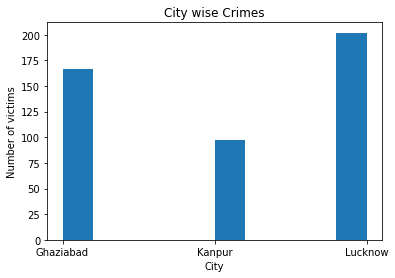

In [12]:
arr = np.array(variable[0])
plt.hist(arr)
plt.title("City wise Crimes")
plt.xlabel("City")
plt.ylabel("Number of victims")
plt.show()

Text(0.5, 1.0, 'Reason wise Comparison')

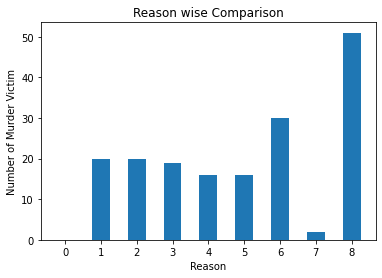

In [13]:
count=[0,0,0,0,0,0,0,0,0];
for i in range(len(variable)) :
    count[variable.iloc[i,1]]=count[variable.iloc[i,1]]+variable.iloc[i,2]+variable.iloc[i,3]+variable.iloc[i,4]
reason = list(("0","1","2","3","4","5","6","7","8"))
plt.bar(reason, count, width = 0.5)
plt.xlabel("Reason")
plt.ylabel("Number of Murder Victim")
plt.title("Reason wise Comparison")


In [14]:
variable[13]=0
variable

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,3.0,10,0,0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0,0,0,0
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0,0,0
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1.0,8,0,0
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0,0,0,0


In [15]:
for i in range(len(variable)) :
    variable.iloc[i,13] = variable.iloc[i,2]+variable.iloc[i,3]+variable.iloc[i,4]+variable.iloc[i,5]+variable.iloc[i,6]+variable.iloc[i,7]+variable.iloc[i,9]+variable.iloc[i,10]
variable.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0,0,0,1.0
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0,0,1.0
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1.0,8,0,1.0
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0,0,0,1.0
465,Lucknow,3,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,1.0


In [16]:
arr1 = np.array(variable[13])

(array([110., 324.,  19.,   6.,   3.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

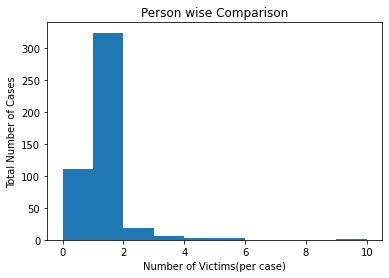

In [17]:

plt.xlabel("Number of Victims(per case)")
plt.ylabel("Total Number of Cases")
plt.title("Person wise Comparison")
plt.hist(arr1)

Text(0.5, 1.0, 'Reason wise Comparison')

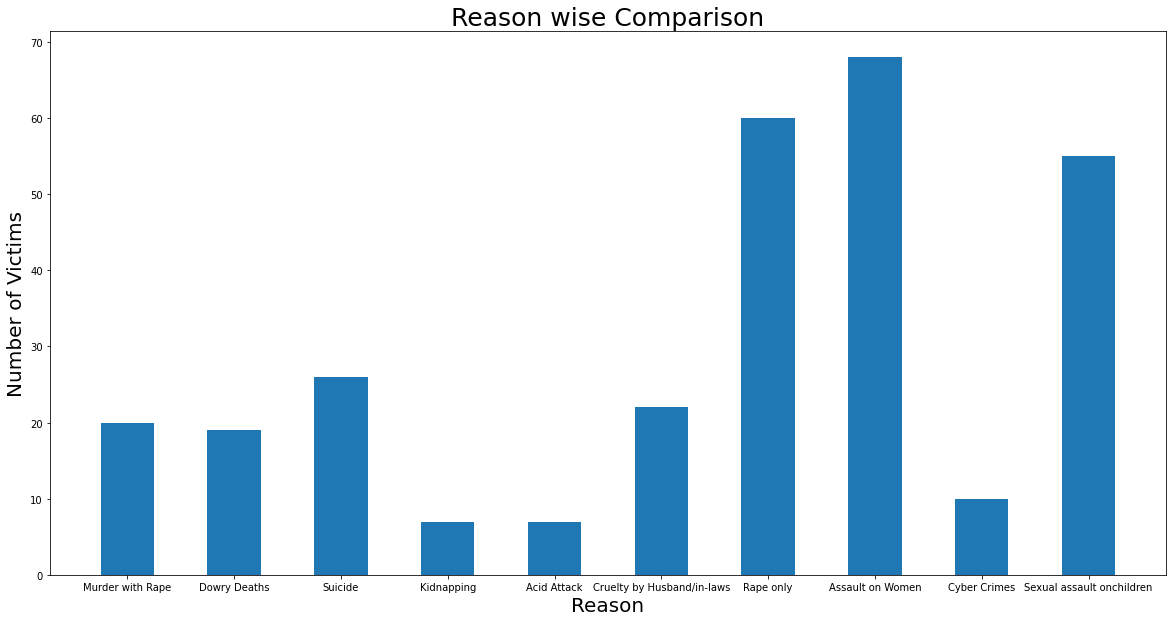

In [18]:
count1=[0,0,0,0,0,0,0,0,0,0,0];
for i in range(len(variable)) :
    for j in range(1,11) :
        if int(variable.iloc[i,8])==(j) or int(variable.iloc[i,11])==(j) or int(variable.iloc[i,12])==(j) :
            count1[j]=count1[j]+variable.iloc[i,9]+variable.iloc[i,10]
del count1[0]
reason = list(("Murder with Rape","Dowry Deaths","Suicide","Kidnapping","Acid Attack","Cruelty by Husband/in-laws","Rape only","Assault on Women","Cyber Crimes","Sexual assault onchildren")) 
plt.figure(figsize=(20,10))
plt.bar(reason, count1, width = 0.5)
plt.xlabel("Reason",fontsize=20)
plt.ylabel("Number of Victims",fontsize=20)
plt.title("Reason wise Comparison",fontsize=25)

Text(0.5, 1.0, 'Reason wise Comparison')

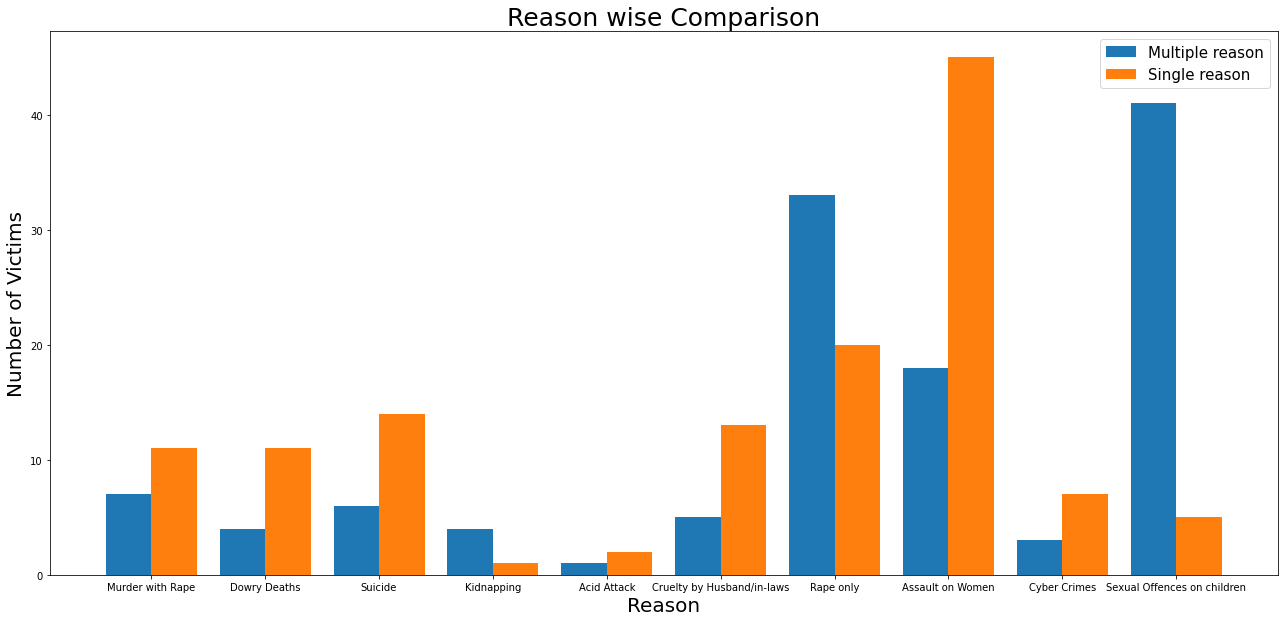

In [19]:
count1=[0,0,0,0,0,0,0,0,0,0];
count2=[0,0,0,0,0,0,0,0,0,0];
for i in range(len(variable)) :
    for j in range(10) :
        if int(variable.iloc[i,8])==(j+1) and int(variable.iloc[i,11])==0 and int(variable.iloc[i,12])==0 :
            count2[j]=count2[j]+1
        elif int(variable.iloc[i,8])==(j+1) and int(variable.iloc[i,11])>0 and int(variable.iloc[i,12])==0 :
            count1[j]=count1[j]+1
            count1[int(variable.iloc[i,11])-1] = count1[int(variable.iloc[i,11])-1] + 1;
        elif int(variable.iloc[i,8])==(j+1) and int(variable.iloc[i,11])>0 and int(variable.iloc[i,12])==0 :
            count1[j]=count1[j]+1
            count1[int(variable.iloc[i,11])-1] = count1[int(variable.iloc[i,11])-1] + 1
            count1[int(variable.iloc[i,12])-1] = count1[int(variable.iloc[i,12])-1] + 1
reason = list(("Murder with Rape","Dowry Deaths","Suicide","Kidnapping","Acid Attack","Cruelty by Husband/in-laws","Rape only","Assault on Women","Cyber Crimes","Sexual Offences on children")) 
X_axis = np.arange(len(reason))
plt.figure(figsize=(22,10))
plt.bar(X_axis-0.2, count1,0.4, label = 'Multiple reason')
plt.bar(X_axis+0.2, count2,0.4, label = 'Single reason')
plt.legend(fontsize=15)
plt.xticks(X_axis, reason)
plt.xlabel("Reason",fontsize=20)
plt.ylabel("Number of Victims",fontsize=20)
plt.title("Reason wise Comparison",fontsize=25)